# Bernstein Vazarani
Before understanding this algo, need to understand the bitwise dot product. 
Assume there are two random bit string x = 000110 and y = 000111. When we do a dot product of x.y, it will give us information regarding how many 1 bits are common between the bit strings, which in this case is 2 (like bit wise AND operator). <br><br>

Specific to Bernstein Vazarani, when we do x.y (mod 2), it outputs result if count of common 1 bits is even or odd and stores it in acillary bit. <br><br>



$$
\begin{equation*}
\begin{aligned}

\ket{\Psi_0} &= \ket{0}^{\otimes n} \ket{-} \\

\ket{\Psi_1} &= \ket{H|0}^{\otimes n} \ket{-} \\

&= \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0,1\}^n} \ket{x} \ket{-} \\

\ket{\Psi_2} = \ket{U_f | \Psi_1} &= \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0,1\}^n} U_f \ket{x} \ket{-} \\

\text{Applied Phase Oracle:} \\

\ket{\Psi_2} &= \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0,1\}^n} (-1)^{f(x)} \ket{x} \ket{-} \\

\text{*Phase Oracle Explanation:} \\
&= U_f \ket{x} \ket{-} \\
&= U_f \ket{x} \left[ \tfrac{1}{\sqrt{2}} (\ket{0} - \ket{1}) \right] \\
&= \ket{x} \left[ \tfrac{1}{\sqrt{2}} (f(x) \oplus \ket{0} - f(x) \oplus \ket{1}) \right] \\
&= \ket{x} . \tfrac{1}{\sqrt{2}} \left[  \ket{f(x)} - \ket{\overline{f(x)}} \right] \\

\text{Phase kickback} &=
\begin{cases}
\ket{x} . \tfrac{1}{\sqrt{2}} \left[  \ket{0} - \ket{1} \right], & f(x)=0 \\
\ket{x} . \tfrac{1}{\sqrt{2}} \left[  \ket{1} - \ket{0} \right], & f(x)=1 \\
\end{cases} \\

&=
\begin{cases}
\ket{x} \ket{-}, & f(x)=0 \\
- \ket{x} \ket{-}, & f(x)=1 \\
\end{cases} \\

&= (-1)^{f(x)} \ket{x} \ket{-} \\

\textbf{Back to Bernstein Vazarani Circuit:}\\

\ket{\Psi_3} = \ket{H | \Psi_2} &= \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0,1\}^n} (-1)^{f(x)} \ket{H | x} \ket{-} \\

\text{Ignored the } \ket{-} \text{, no impact on circuit} \\

\ket{\Psi_3} &= \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0,1\}^n} \sum_{z \epsilon\{0,1\}^n} (-1)^{f(x)} \frac{1}{\sqrt{2^n}} (-1)^{x.z(mod2)} \ket{z} \\

\text{f(x) = x.s(mod2), where s is the secret bit string} \\

&= \frac{1}{2^n} \sum_{x \epsilon\{0,1\}^n} \sum_{z \epsilon\{0,1\}^n} (-1)^{x.s(mod2)} (-1)^{x.z(mod2)} \ket{z} \\
&= \frac{1}{2^n} \sum_{x \epsilon\{0,1\}^n} \sum_{z \epsilon\{0,1\}^n} (-1)^{(s+z).x(mod2)} \ket{z} \\

\text{z = s, trying to measure secret string s} \\

&= \frac{1}{2^n} \sum_{x \epsilon\{0,1\}^n} \sum_{s \epsilon\{0,1\}^n} (-1)^{(s+s).x(mod2)} \ket{s} \\
&= \frac{1}{2^n} \sum_{x \epsilon\{0,1\}^n} (-1)^{(s+s).x(mod2)} \left[ \sum_{s \epsilon\{0,1\}^n}  \ket{s} \right] \\


\text{s+s, here + is xor operation, which is = 0} \\
\text{s+s, if + is bitwise sum (no carry forward), then 2.s (mod2) = 0} \\
x + y .(mod2) = x \oplus y \text{ (condition: no carry forward)} \\
\text{Hence probability amplitude to measure s is:} \\

&= \frac{1}{2^n} \sum_{x \epsilon\{0,1\}^n} (-1)^{0} \\
&= \frac{1}{2^n} . 2^n = 1 \\

\end{aligned}
\end{equation*}
$$

### Hadamard Gate
In Deutsch Jozsa notebook we have derived it equation to:
$$
\begin{equation*}
\begin{aligned}

\ket{H^{\otimes n}|x^{\otimes n}} &= \frac{1}{\sqrt{2^n}} \sum_{y \epsilon\{0, 1\}^n} (-1)^{x.y} \ket{y} \\

\end{aligned}
\end{equation*}
$$

It can also be re-written with (mod 2). mod 2 reduces the value to {0,1}, which gives the same output.
$$
\begin{equation*}
\begin{aligned}

\ket{H^{\otimes n}|x^{\otimes n}} &= \frac{1}{\sqrt{2^n}} \sum_{y \epsilon\{0, 1\}^n} (-1)^{x.y.(mod 2)} \ket{y} \\

\text{x.y is bitwise dot product} \\
(-1)^{x.y.(mod 2)} &= 
\begin{cases}
(-1)^0, & x.y=\text{even} \\
(-1)^1, & x.y=\text{odd}
\end{cases}

\end{aligned}
\end{equation*}
$$

In [138]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister, AncillaRegister
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from IPython.display import display

import numpy as np

In [ ]:
import random

def generate_binary_string(n):
    # Generate a random number with n bits
    number = random.getrandbits(n)
    # Convert the number to binary
    # '0{n}b' , pad the value with 0 if length is less than n
    binary_string = format(number, f'0{n}b')
    return binary_string


In [ ]:
def bv_oracle(qr_count, ar_count):
    qr = QuantumRegister(qr_count)
    ar = AncillaRegister(ar_count)
    qc = QuantumCircuit(qr, ar)

    # generate a secret bit string with length=number of qubits
    secret = generate_binary_string(qr_count)

    # enumerate(string) returns iterated location and value
    for loc, s in enumerate(secret):
        if s == '1':
            qc.cx(qr[loc], ar[0])

    return qc, secret

In [ ]:
def bernstein_vazarani(qr_count, ar_count, oracle=None):
    qr = QuantumRegister(qr_count, 'q')
    cr = ClassicalRegister(qr_count, 'c')
    ar = AncillaRegister(ar_count, 'a')

    qc = QuantumCircuit(qr, ar, cr)

    # Prepapred ancilla in |->
    qc.x(ar[0])
    qc.h(ar[0])
    
    # Input qubits in H superposition 
    for qubit in qr:
        qc.h(qubit)

    qc.barrier()

    # Added the Bernstein Vazarani's oracle here
    blackbox = oracle.to_gate()
    blackbox.label = "$U_f$"
    qc = qc.compose(blackbox)

    qc.barrier()
    
    # Final hadamard for interfernce
    for qubit in qr:
        qc.h(qubit)

    qc.measure(qr, cr)

    return qc

There's 2 values in a bit string MSB (most significant byte) and LSB (least significant byte) <br>
$q_0 = LSB\\
q_n = MSB\\$
There are 2 ways to order bit string, little endian and big endian <br>
physics notation is: MSB -> LSB (Big Endian)<br>
qiskit notation is: LSB -> MSB (Little Endian)<br>
hence the reversal


random secret bit-string:  00011
random secret bit-string (reversed):  11000
measured qubits:  {'11000': 1000}


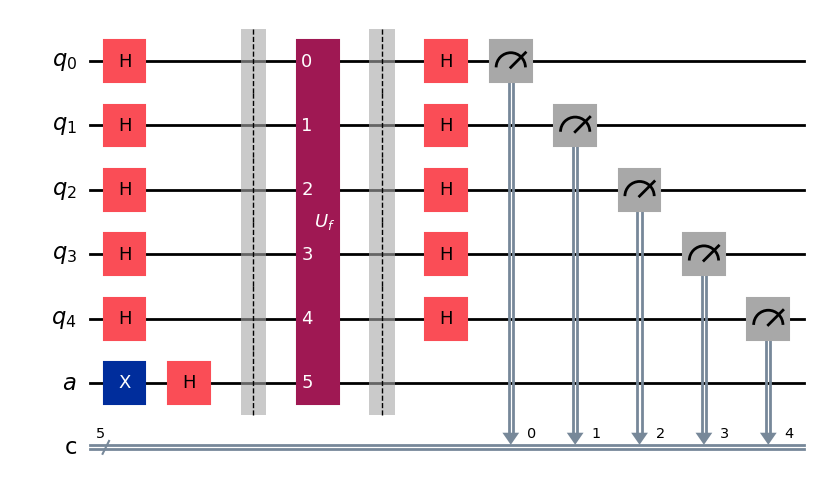

In [142]:
qr_count = 5
ar_count = 1

oracle, secret_string = bv_oracle(qr_count, ar_count)

circuit = bernstein_vazarani(qr_count, ar_count, oracle)
backend = AerSimulator()
compiled_qc = transpile(circuit, backend)
results = backend.run(compiled_qc, shots=1000).result()
count = results.get_counts()

print("random secret bit-string: ", secret_string)
print("random secret bit-string (reversed): ", secret_string[::-1])
print("measured qubits: ", count)
display(circuit.draw('mpl'))